<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – Thresholding, Segmentasi Sederhana

**Nama :** Muhamad Anang Abdullah Faqih

**Kelas :** D4 TI 3D

**NIM :** 2241720070


1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas

In [11]:
filename = ('/content/drive/MyDrive/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170

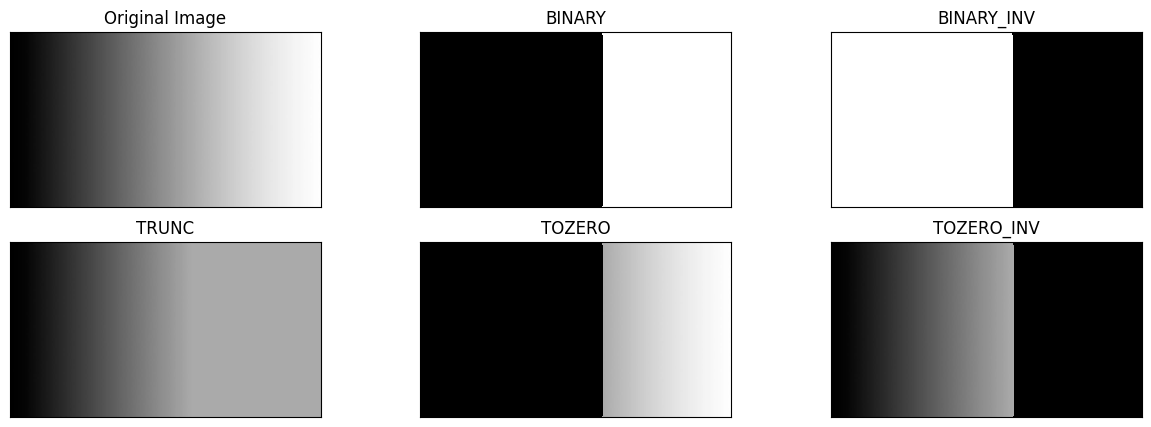

In [13]:
binary_threshold = np.where(img > thresh, 255, 0).astype(np.uint8)
binary_inverted_threshold = np.where(img < thresh, 255, 0).astype(np.uint8)
truncated_threshold = np.where(img > thresh, thresh, img).astype(np.uint8)
tozero_threshold = np.where(img > thresh, img, 0).astype(np.uint8)
tozero_inverted_threshold = np.where(img > thresh, 0, img).astype(np.uint8)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary_threshold, binary_inverted_threshold, truncated_threshold, tozero_threshold, tozero_inverted_threshold]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library.

In [14]:
balloon = '/content/drive/MyDrive/Images/balloon.jpg'
image = cv.imread(balloon)
grayscale_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [26]:
def otsu_thresholding(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range= [0, 256]) # Hitung Histogram

    total_pixel = image.size
    probability = hist / total_pixel # Hitung probabilitas

    global_men = np.sum(np.arange(256) * probability) # hitung rata rata global

    max_variance = 0
    optimal_threshold = 0


    for t in range(256):   # iterasi tiap threshold
      w0 = np.sum(probability[:t]) # kelas 1 dibawah threshold
      if w0 == 0:
        continue
      w1 = np.sum(probability[t:]) # kelas 2 di atas threshold
      if w1 == 0:
        break
    # kelas 1 rata rata
      mu0 = np.sum(np.arange(t) * probability[:t]) / w0
    # kelas 2 rata rata
      mu1 = np.sum(np.arange(t, 256) * probability[t:]) / w1

      variance = w0 * w1 * (mu0 - mu1) ** 2 # varians antar kelas

      if variance > max_variance: #pemilihan trheshold optimal
        max_variance = variance
        optimal_threshold = t
    return optimal_threshold

In [27]:
otsu_threshold = otsu_thresholding(grayscale_img)

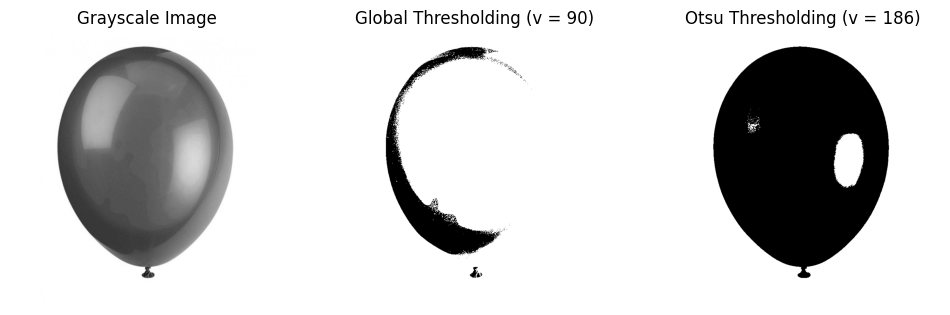

In [28]:
binary_image = (grayscale_img > otsu_threshold).astype(np.uint8) * 255
global_threshold = (grayscale_img > 90).astype(np.uint8) * 255

# Tampilkan citra grayscale dan citra biner
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.subplot(1, 3, 2)
plt.imshow(global_threshold, cmap='gray')
plt.axis('off')
plt.title('Global Thresholding (v = 90)')

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title('Otsu Thresholding (v = 186)')

plt.show()